In [1]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from plot_util import plot_history

Using TensorFlow backend.


In [2]:
MAX_FEATURES = 10000
MAXLEN = 20

In [3]:
(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=MAX_FEATURES)

dict_word_idx = imdb.get_word_index()
dict_rev_word_idx = {idx: word for word, idx in dict_word_idx.items()}

def decode(data):
    return ' '.join(dict_rev_word_idx.get(i - 3, '?') for i in data)

In [4]:
sample_data = train_x[0]
# print(sample_data)
print(decode(sample_data))

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [5]:
train_x = pad_sequences(train_x, maxlen=MAXLEN)
test_x = pad_sequences(test_x, maxlen=MAXLEN)

In [6]:
print("train_x.shape = {}".format(train_x.shape))
sample_data = train_x[0]
# print(sample_data)
print(decode(sample_data))

train_x.shape = (25000, 20)
story was so lovely because it was true and was someone's life after all that was shared with us all


In [7]:
model = Sequential()
model.add(Embedding(MAX_FEATURES, 8, input_length=MAXLEN))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
history = model.fit(
    train_x, train_y, epochs=10, batch_size=32, 
    validation_split=0.2, 
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
 - 2s - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
 - 2s - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
 - 2s - loss: 0.4752 - acc: 0.7808 - val_loss: 0.5113 - val_acc: 0.7384
Epoch 4/10
 - 2s - loss: 0.4263 - acc: 0.8077 - val_loss: 0.5008 - val_acc: 0.7452
Epoch 5/10
 - 2s - loss: 0.3930 - acc: 0.8258 - val_loss: 0.4981 - val_acc: 0.7538
Epoch 6/10
 - 2s - loss: 0.3668 - acc: 0.8395 - val_loss: 0.5014 - val_acc: 0.7530
Epoch 7/10
 - 2s - loss: 0.3435 - acc: 0.8533 - val_loss: 0.5052 - val_acc: 0.7520
Epoch 8/10
 - 2s - loss: 0.3223 - acc: 0.8657 - val_loss: 0.5132 - val_acc: 0.7486
Epoch 9/10
 - 2s - loss: 0.3022 - acc: 0.8766 - val_loss: 0.5213 - val_acc: 0.7490
Epoch 10/10
 - 2s - loss: 0.2839 - acc: 0.8860 - val_loss: 0.5303 - val_acc: 0.7466


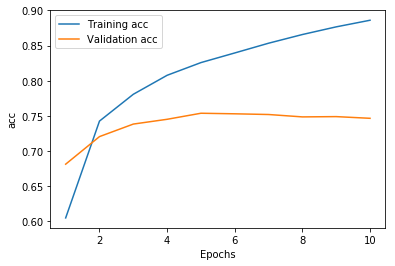

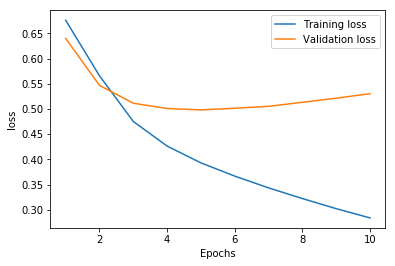

In [9]:
plot_history(history, metrics=['acc', 'loss'])